### 1. Getting started with video capture (0.5)

Input: video clip (from camera o MP4)

Output: video with text or icon (small image) embedded

In [7]:
#Import library
import cv2

#Import video file
cap = cv2.VideoCapture('./resources/sample_video.mp4')

#Check whether video file is imported successfully or fail
if (cap.isOpened() == False):
    print('Error: Cannot load the video')

#Get specifications of original video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

#Create VideoWriter to save video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, fps, (500, 500))

#Information to put text into video
text = "Computer Vision Demo"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 255, 255)  # White color in BGR
font_thickness = 2
text_position = (50, 50)  # (x, y) coordinates

while(cap.isOpened()):
    
# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
    # Display the resulting frame
        resized = cv2.resize(frame, (500, 500), interpolation=cv2.INTER_CUBIC)
        cv2.putText(resized, text, text_position, font, font_scale, font_color, font_thickness, cv2.LINE_AA)

        out.write(resized)

        cv2.imshow('Frame', resized)
        
    # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

# Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()
out.release()
cv2.destroyAllWindows()

print("Video processing complete. Output saved as 'output_video.avi'")

Video processing complete. Output saved as 'output_video.avi'


### 2. Simulate Pinhole Camera Projection
–Input: (1) array of 3D points; (2) Intrinsic parameters (3x3 array K) containing focal length, image center; (3) Extrinsic parameters (3x3 array RT) containing rotation and translation.

–Output: Scatter projected 3D points onto image plane

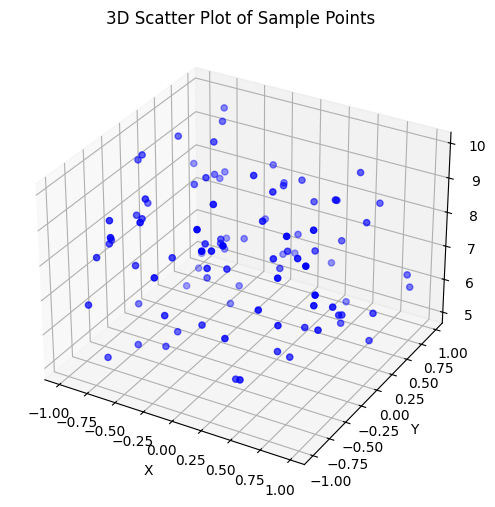

Points in 3D  [[-2.50919762e-01 -9.37141629e-01  8.21015823e+00]
 [ 9.01428613e-01  2.72820823e-01  5.42069982e+00]
 [ 4.63987884e-01 -3.71288038e-01  5.80814357e+00]
 [ 1.97316968e-01  1.71413823e-02  9.49277094e+00]
 [-6.87962719e-01  8.15132948e-01  8.03214530e+00]
 [-6.88010959e-01 -5.01415542e-01  5.04598526e+00]
 [-8.83832776e-01 -1.79234154e-01  5.50735771e+00]
 [ 7.32352292e-01  5.11102277e-01  8.31750885e+00]
 [ 2.02230023e-01 -5.42403669e-01  5.02530792e+00]
 [ 4.16145156e-01 -8.46040180e-01  5.80404026e+00]
 [-9.58831011e-01 -4.20497094e-01  7.74366895e+00]
 [ 9.39819704e-01 -6.77557425e-01  8.45947599e+00]
 [ 6.64885282e-01  8.59395305e-01  8.25980630e+00]
 [-5.75321779e-01  6.16240759e-01  6.12134655e+00]
 [-6.36350066e-01  2.66807513e-01  8.56089611e+00]
 [-6.33190980e-01  7.42921180e-01  6.18624544e+00]
 [-3.91515514e-01  6.07344154e-01  6.62699849e+00]
 [ 4.95128633e-02 -6.26859882e-01  8.73245703e+00]
 [-1.36109963e-01  7.85117997e-01  8.24816450e+00]
 [-4.17541720e-01

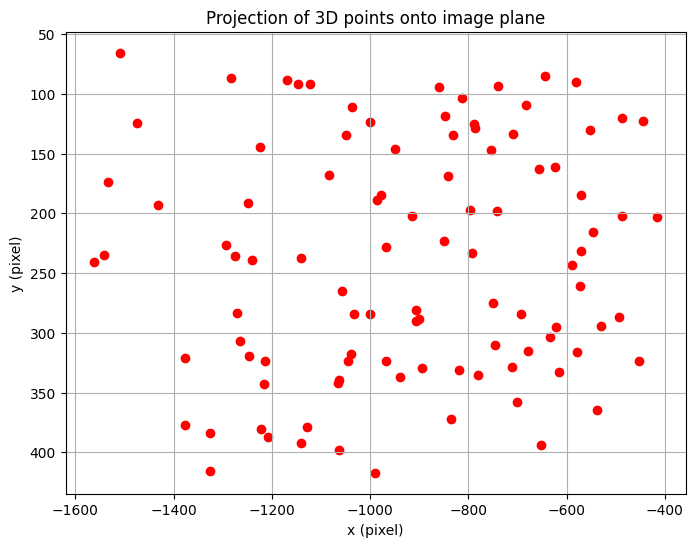

[[-1063.03129361   397.86494761]
 [ -414.83221513   203.01630125]
 [ -530.38893851   294.36147309]
 [-1141.18022054   237.36150288]
 [-1170.18104902    88.77070494]
 [ -616.17775194   333.02723861]
 [ -750.3856115    274.83515497]
 [ -840.78125314   168.67119799]
 [ -452.79288252   323.41094747]
 [ -537.29463895   364.9656582 ]
 [-1212.95622503   323.24266476]
 [ -819.35794816   331.2562952 ]
 [ -846.45699066   118.63545163]
 [ -786.76460363   128.58113909]
 [-1249.49273849   191.0854414 ]
 [ -813.32099656   103.89673979]
 [ -830.3996181    134.56939162]
 [-1063.4929843    339.31411591]
 [-1036.63667262   110.8658311 ]
 [-1294.1758832    226.2633584 ]
 [ -949.30034662   145.83232133]
 [-1146.05571736    91.89345678]
 [ -634.28075931   303.52008374]
 [ -835.96505829   371.83041354]
 [ -710.26573006   328.61794304]
 [ -573.29339376   260.93719388]
 [-1473.91196163   124.34111694]
 [ -788.16851713   125.21974634]
 [-1139.67900189   392.15093308]
 [-1274.1149767    235.79865605]
 [-1056.62

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def get_rotation_matrix(axis, angle_degrees):
    """
    Trả về ma trận xoay 3x3.
    Tham số:
    - axis: chuỗi 'x', 'y', hoặc 'z' xác định trục xoay.
    - angle_degrees: góc xoay tính bằng độ.
    """
    angle = np.radians(angle_degrees)
    if axis.lower() == 'x':
        R = np.array([[1, 0, 0],
                      [0, np.cos(angle), -np.sin(angle)],
                      [0, np.sin(angle),  np.cos(angle)]])
    elif axis.lower() == 'y':
        R = np.array([[ np.cos(angle), 0, np.sin(angle)],
                      [0, 1, 0],
                      [-np.sin(angle), 0, np.cos(angle)]])
    elif axis.lower() == 'z':
        R = np.array([[np.cos(angle), -np.sin(angle), 0],
                      [np.sin(angle),  np.cos(angle), 0],
                      [0, 0, 1]])
    else:
        raise ValueError("Axis không hợp lệ. Chọn 'x', 'y' hoặc 'z'.")
    return R

def get_translation_vector(tx, ty, tz):
    """
    Trả về vector dịch chuyển 3x1.
    """
    return np.array([[tx], [ty], [tz]])

def project_points(points, K, RT):
    """
    Chiếu các điểm 3D sang 2D trên image plane của camera.
    
    Tham số:
    - points: mảng numpy có kích thước (N, 3) chứa các điểm 3D.
    - K: ma trận nội tại 3x3 của camera.
    - RT: ma trận extrinsic 3x4 (gồm Rotation và Translation).
    
    Trả về:
    - pts_proj: mảng numpy có kích thước (N, 2) chứa các điểm chiếu (pixel coordinates).
    """
    # Thêm coordinate đồng nhất (homogeneous coordinate)
    N = points.shape[0]
    points_homog = np.hstack((points, np.ones((N, 1))))
    
    # Tính điểm trong hệ tọa độ camera
    points_cam = (RT @ points_homog.T).T  # kết quả có kích thước (N, 3)
    
    # Áp dụng ma trận nội tại
    points_img = (K @ points_cam.T).T  # kết quả có kích thước (N, 3)
    
    # Chia đồng nhất, lấy các pixel coordinate
    pts_proj = points_img[:, :2] / points_img[:, 2:3]
    
    return pts_proj

# Tạo dữ liệu điểm 3D mẫu (những điểm nằm trước camera, với z > 0)
num_points = 100
np.random.seed(42)
# X, Y ngẫu nhiên trong khoảng [-1, 1], Z trong khoảng [5, 10] để đảm bảo không chia cho 0
points_3d = np.hstack((
    2 * (np.random.rand(num_points, 1) - 0.5),
    2 * (np.random.rand(num_points, 1) - 0.5),
    5 + 5 * np.random.rand(num_points, 1)
))

# Vẽ biểu đồ 3D của các điểm mẫu
fig_3d = plt.figure(figsize=(8, 6))
ax = fig_3d.add_subplot(111, projection='3d')
ax.scatter(points_3d[:,0], points_3d[:,1], points_3d[:,2], c='b', marker='o')
ax.set_title("3D Scatter Plot of Sample Points")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

print('Points in 3D ', points_3d)

# Định nghĩa ma trận nội tại K mẫu
fx, fy = 800, 800      # tiêu cự theo pixel
cx, cy = 320, 240      # tâm ảnh
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,   0,  1]])

# Thiết lập tham số cho ma trận extrinsic:
# Sử dụng hàm get_rotation_matrix để lấy ma trận quay với góc và trục mong muốn.
axis = 'y'             # chọn trục xoay ('x', 'y', 'z')
angle_degrees = 90     # góc xoay
R = get_rotation_matrix(axis, angle_degrees)

# Sử dụng hàm get_translation_vector để lấy vector dịch chuyển.
tx, ty, tz = 0, 0, -5  # dịch chuyển theo X, Y, Z
t = get_translation_vector(tx, ty, tz)

# Xây dựng ma trận RT: kết hợp ma trận R và vector t
RT = np.hstack((R, t))  # kích thước 3x4

# Chiếu các điểm 3D sang image plane
pts_2d = project_points(points_3d, K, RT)

# Vẽ đồ thị scatter của các điểm sau chiếu
plt.figure(figsize=(8, 6))
plt.scatter(pts_2d[:, 0], pts_2d[:, 1], c='r', marker='o')
plt.title("Projection of 3D points onto image plane")
plt.xlabel("x (pixel)")
plt.ylabel("y (pixel)")
plt.gca().invert_yaxis()  # Invert y-axis nếu muốn theo convention của ảnh
plt.grid(True)
plt.show()

print(pts_2d)

### 3. Perspective Projection Visualization
–Input: (1) 3D points generated by np.meshgrid(np.linspace(, , ), np.linspace(, , )); (2) Focal length.

-Output: (1) Scatter 3D (Hint: fig.add_subplot(121, projection='3d’)); (2) Scatter projected 2D points (Hint: fig.add_subplot(122)).

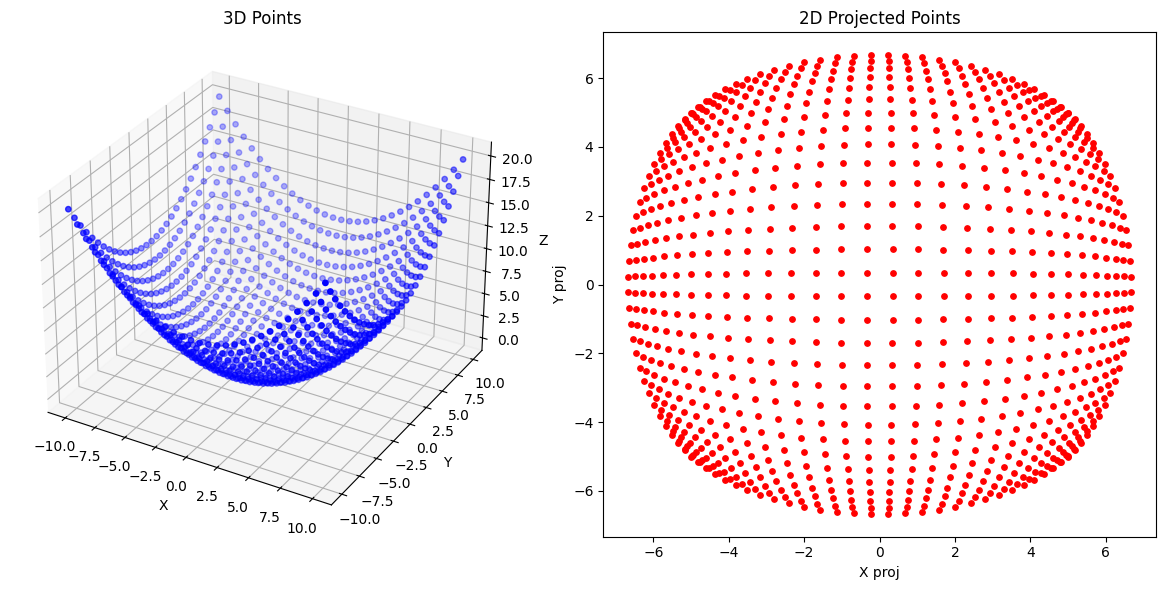

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # đảm bảo cài đặt matplotlib có hỗ trợ 3D

# Tạo lưới điểm 2D với np.linspace và np.meshgrid
x = np.linspace(-10, 10, 30)   # tạo 30 giá trị từ -10 đến 10 cho trục x
y = np.linspace(-10, 10, 30)   # tạo 30 giá trị từ -10 đến 10 cho trục y
X, Y = np.meshgrid(x, y)

# Giả sử z được sinh ra từ một hàm số (ví dụ: paraboloid) để tạo ra một số điểm khác nhau theo trục z
Z = 0.1 * (X**2 + Y**2)

# Khai báo focal length (độ dài tiêu cự)
focal_length = 20.0

# Thực hiện phép chiếu perspective:
# Công thức chiếu: x_proj = f * x / (z + f), y_proj = f * y / (z + f)
# Ta cộng focal_length vào Z để tránh chia cho 0 và để đảm bảo rằng điểm chiếu nằm trên mặt phẳng ảnh.
x_proj = focal_length * X / (Z + focal_length)
y_proj = focal_length * Y / (Z + focal_length)

# Vẽ hai hình scatter trên cùng một figure: trái là biểu đồ 3D ban đầu, phải là biểu đồ 2D sau chiếu
fig = plt.figure(figsize=(12, 6))

# Subplot 3D: trực quan hóa các điểm 3D ban đầu
ax3d = fig.add_subplot(121, projection='3d')
ax3d.scatter(X, Y, Z, c='blue', marker='o', s=15)
ax3d.set_title("3D Points")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Subplot 2D: trực quan hóa các điểm sau khi chiếu perspective
ax2d = fig.add_subplot(122)
ax2d.scatter(x_proj, y_proj, c='red', marker='o', s=15)
ax2d.set_title("2D Projected Points")
ax2d.set_xlabel("X proj")
ax2d.set_ylabel("Y proj")

plt.tight_layout()
plt.show()

### 4. Visualizing Field of View
–Input: (1) 3D cube array of 8 3D points, array of 12 edges; (2) focal lengths; (3) image size

–Output: Visualize projected 3D cube with focal lengths
Hint:  (1) Project 3D point to 2D using the pinhole camera model

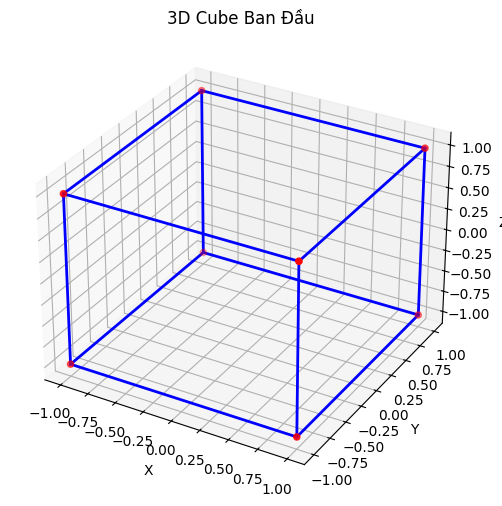

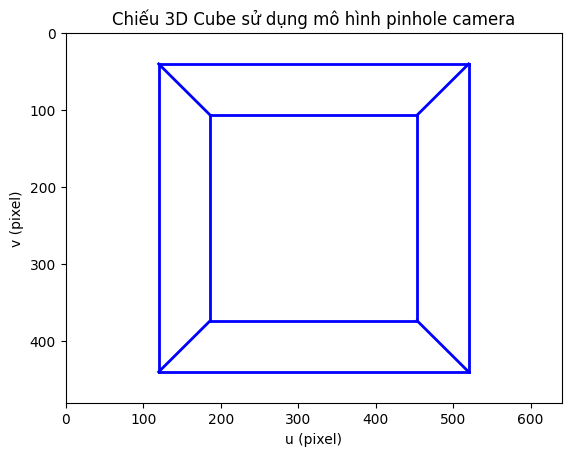

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import module cần thiết

# 1. Định nghĩa các điểm đỉnh của cube (8 điểm 3D)
points_3d = np.array([
    [-1, -1,  1],
    [ 1, -1,  1],
    [ 1,  1,  1],
    [-1,  1,  1],
    [-1, -1, -1],
    [ 1, -1, -1],
    [ 1,  1, -1],
    [-1,  1, -1]
])

# 2. Định nghĩa các cạnh của cube dưới dạng cặp chỉ số các đỉnh (12 cạnh)
edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],  # mặt trước
    [4, 5], [5, 6], [6, 7], [7, 4],  # mặt sau
    [0, 4], [1, 5], [2, 6], [3, 7]   # các cạnh nối giữa mặt trước và mặt sau
]

# 3. Cài đặt tham số camera: tiêu cự và kích thước ảnh
focal_length = 800  # tiêu cự tính theo pixel (giả sử fx = fy = focal_length)
image_width = 640   # chiều rộng ảnh
image_height = 480  # chiều cao ảnh

# Tọa độ tâm ảnh
cx = image_width / 2
cy = image_height / 2

# 4. Dịch chuyển các điểm cube sao cho toàn bộ cube nằm trước camera (đảm bảo các giá trị Z > 0)
translated_points = points_3d.copy()
translated_points[:, 2] += 5  # dịch chuyển theo trục Z

# 5. Áp dụng mô hình pinhole để chiếu các điểm 3D xuống hệ tọa độ 2D
projected_points = []
for point in translated_points:
    x, y, z = point
    # Công thức chiếu: u = fx * x / z + cx, v = fy * y / z + cy
    u = focal_length * x / z + cx
    v = focal_length * y / z + cy
    projected_points.append([u, v])
projected_points = np.array(projected_points)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Vẽ các đỉnh của cube
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='r', marker='o')

# Vẽ các cạnh của cube trong không gian 3D
for edge in edges:
    pt1 = points_3d[edge[0]]
    pt2 = points_3d[edge[1]]
    xs = [pt1[0], pt2[0]]
    ys = [pt1[1], pt2[1]]
    zs = [pt1[2], pt2[2]]
    ax.plot(xs, ys, zs, 'b-', linewidth=2)

ax.set_title('3D Cube Ban Đầu')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# 6. Vẽ hình chiếu 2D của cube
plt.figure(figsize=(image_width/100, image_height/100))
# Cài đặt hệ trục cho ảnh: trục y đảo ngược để phù hợp với hệ tọa độ ảnh
plt.xlim(0, image_width)
plt.ylim(image_height, 0)

# Vẽ các cạnh của cube
for edge in edges:
    pt1 = projected_points[edge[0]]
    pt2 = projected_points[edge[1]]
    plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'b-', linewidth=2)

plt.title('Chiếu 3D Cube sử dụng mô hình pinhole camera')
plt.xlabel('u (pixel)')
plt.ylabel('v (pixel)')
plt.show()


### 5. Point Perspective Stimulation

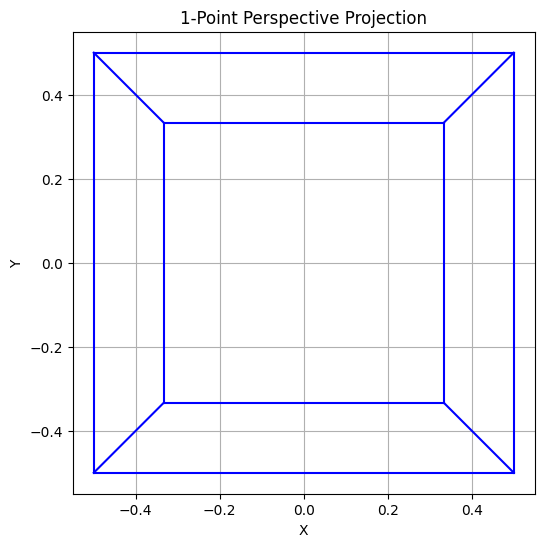

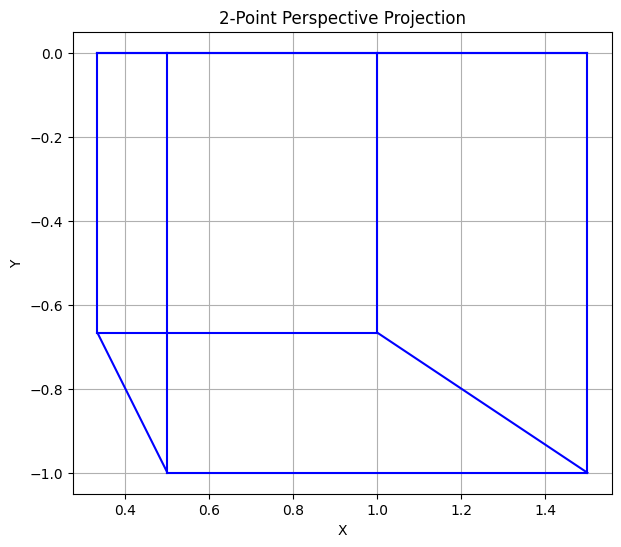

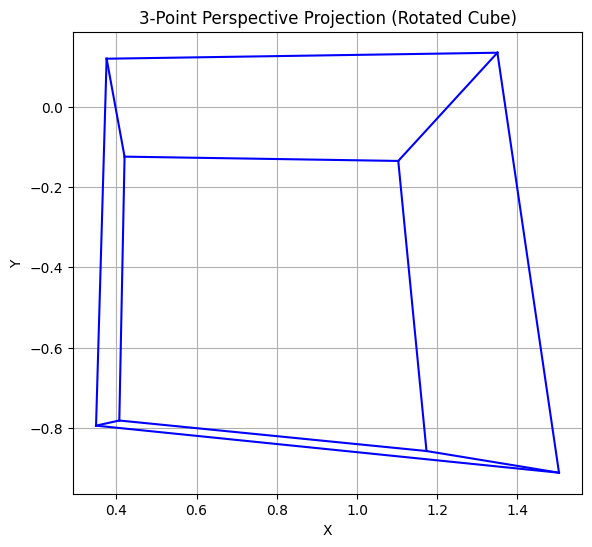

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def project_3d_to_2d_perspective(points_3d, camera_position, focal_length):
    """
    Mô phỏng phép chiếu phối cảnh từ điểm 3D sang 2D.

    Args:
        points_3d (np.array): Mảng numpy chứa các điểm 3D, kích thước (N, 3).
        camera_position (np.array): Vị trí của camera trong không gian 3D, kích thước (3,).
        focal_length (float): Tiêu cự của camera (khoảng cách từ perspective point đến mặt phẳng ảnh).

    Returns:
        np.array: Mảng numpy chứa các điểm 2D đã chiếu, kích thước (N, 2).
    """

    # 1. Chuyển điểm 3D về hệ tọa độ camera
    points_relative_to_camera = points_3d - camera_position

    # 2. Chiếu phối cảnh
    points_2d = []
    for point_3d in points_relative_to_camera:
        x, y, z = point_3d
        if z <= 0: # Điểm ở phía sau camera, không chiếu
            points_2d.append([np.nan, np.nan]) # Hoặc xử lý khác tùy ý
            continue

        # Phép chiếu phối cảnh cơ bản: x' = f*x/z, y' = f*y/z
        x_projected = focal_length * x / z
        y_projected = focal_length * y / z
        points_2d.append([x_projected, y_projected])

    return np.array(points_2d)

# --- Ví dụ 1: 1-Point Perspective ---
# Định nghĩa hình hộp chữ nhật (cube)
cube_3d_points = np.array([
    [-1, -1, -1],  # Điểm gốc
    [1, -1, -1],
    [1, 1, -1],
    [-1, 1, -1],
    [-1, -1, 1],
    [1, -1, 1],
    [1, 1, 1],
    [-1, 1, 1]
])

# Kết nối các điểm để tạo cạnh cube
cube_edges = [
    [0, 1], [1, 2], [2, 3], [3, 0], # Mặt đáy
    [4, 5], [5, 6], [6, 7], [7, 4], # Mặt trên
    [0, 4], [1, 5], [2, 6], [3, 7]  # Cạnh dọc
]

# Tham số camera
camera_pos_1point = np.array([0, 0, -5]) # Camera nhìn từ phía trước
focal_length = 2

# Chiếu 3D -> 2D
projected_points_1point = project_3d_to_2d_perspective(cube_3d_points, camera_pos_1point, focal_length)

# --- Vẽ hình 1-Point Perspective ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111) # Không cần 3D plot ở đây, vì đã là 2D

# Vẽ các cạnh của cube đã chiếu
for edge in cube_edges:
    p1_2d = projected_points_1point[edge[0]]
    p2_2d = projected_points_1point[edge[1]]
    if not np.isnan(p1_2d[0]) and not np.isnan(p2_2d[0]): # Kiểm tra điểm hợp lệ
        ax.plot([p1_2d[0], p2_2d[0]], [p1_2d[1], p2_2d[1]], 'b-')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("1-Point Perspective Projection")
ax.set_aspect('equal') # Để tỷ lệ trục X và Y bằng nhau
plt.grid(True)
plt.show()


# --- Ví dụ 2: 2-Point Perspective ---
camera_pos_2point = np.array([-2, 1, -5]) # Camera nhìn từ góc
projected_points_2point = project_3d_to_2d_perspective(cube_3d_points, camera_pos_2point, focal_length)

# --- Vẽ hình 2-Point Perspective ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for edge in cube_edges:
    p1_2d = projected_points_2point[edge[0]]
    p2_2d = projected_points_2point[edge[1]]
    if not np.isnan(p1_2d[0]) and not np.isnan(p2_2d[0]):
        ax.plot([p1_2d[0], p2_2d[0]], [p1_2d[1], p2_2d[1]], 'b-')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("2-Point Perspective Projection")
ax.set_aspect('equal')
plt.grid(True)
plt.show()


# --- Ví dụ 3: 3-Point Perspective (Nâng cao - cần xoay cube để thấy rõ hơn) ---
# Để thấy rõ 3-point perspective, chúng ta sẽ xoay cube một chút
from scipy.spatial.transform import Rotation as R

# Xoay cube quanh trục X và Y
rotation_x = R.from_euler('x', 20, degrees=True)
rotation_y = R.from_euler('y', 15, degrees=True)
rotated_cube_points = rotation_y.apply(rotation_x.apply(cube_3d_points))

camera_pos_3point = np.array([-2, 1, -5])
projected_points_3point = project_3d_to_2d_perspective(rotated_cube_points, camera_pos_3point, focal_length)

# --- Vẽ hình 3-Point Perspective ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for edge in cube_edges: # Vẫn dùng edge cũ vì chỉ là cách vẽ các cạnh nối điểm
    p1_2d = projected_points_3point[edge[0]]
    p2_2d = projected_points_3point[edge[1]]
    if not np.isnan(p1_2d[0]) and not np.isnan(p2_2d[0]):
        ax.plot([p1_2d[0], p2_2d[0]], [p1_2d[1], p2_2d[1]], 'b-')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("3-Point Perspective Projection (Rotated Cube)")
ax.set_aspect('equal')
plt.grid(True)
plt.show()